# 周波数応答　ゲイン・フェーズ　ボード線図　ナイキスト線図


In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 周波数応答プロット

周波数領域が基本的に虚軸上のラプラス領域の一部であることを覚えていれば、周波数応答は数値的に計算するのが非常に簡単です。または数学的にも計算できます。s=jω  
ω　各周波数　Rad/sec

In [2]:
omega = numpy.logspace(-2, 2, 1000)
s = omega*1j

In [3]:
omega[:5]

array([0.01      , 0.01009262, 0.0101861 , 0.01028045, 0.01037567])

In [5]:
s[:5]

array([0.+0.01j      , 0.+0.01009262j, 0.+0.0101861j , 0.+0.01028045j,
       0.+0.01037567j])

一次伝達関数 G1

In [6]:
tau1 = 2
G1 = 1/(tau1*s + 1)

複素極を含む 二次伝達関数　G2

In [8]:
tau = 1
zeta = 0.5
G2 = 1/(tau**2*s**2 + 2*tau*zeta*s + 1)

# [Bode線図](https://ja.wikipedia.org/wiki/%E3%83%9C%E3%83%BC%E3%83%89%E7%B7%9A%E5%9B%B3)　x軸：ω　y軸:　絶対値・偏角　

In [33]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(omega, numpy.abs(G))
    plt.xlabel("Frequency(ω)")
    ax_mag.set_ylabel("Magnitude|G|")
    ax_phase.semilogx(omega, numpy.angle(G))
    ax_phase.set_ylabel("Phase(Rad)")

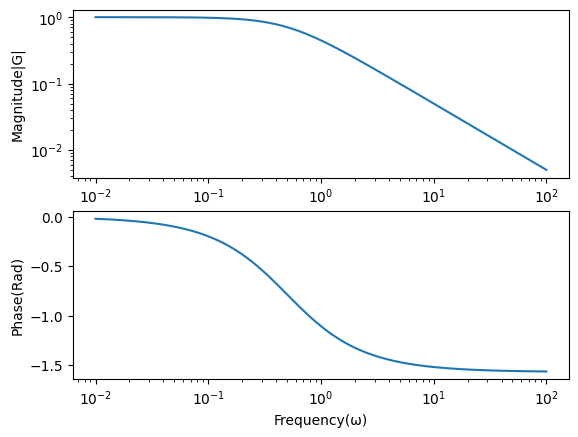

In [34]:
bode(G1)

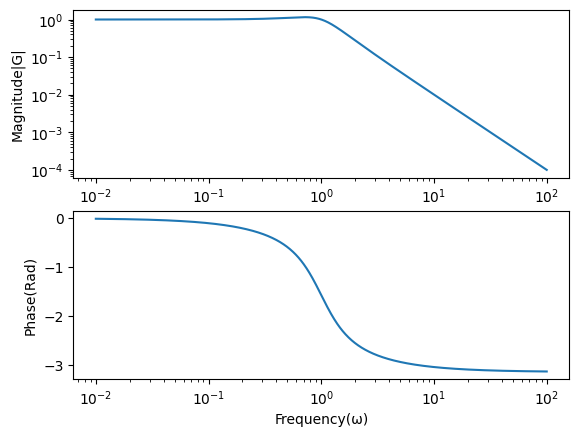

In [35]:
bode(G2)

伝達関数の乗算は、関数の加算と同義

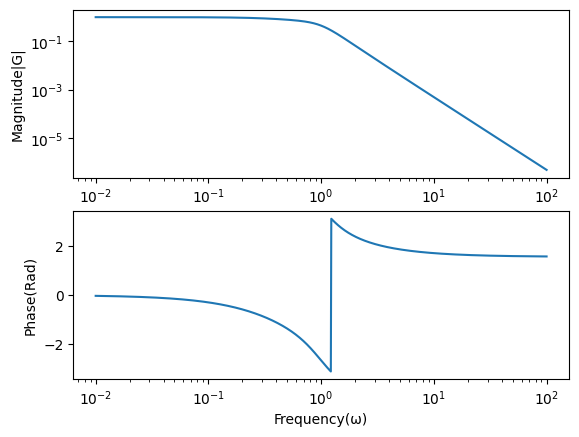

In [36]:
bode(G1*G2)

−πとπでその不連続性が発生します。
これを取り除くには、2πを減算して不連続性を除去する関数numpy.unwrapを使用するようにボード関数を再定義する必要があります。


In [37]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(omega, numpy.abs(G))
    plt.xlabel("Frequency(ω)")
    ax_mag.set_ylabel("Magnitude|G|")
    ax_phase.semilogx(omega,  numpy.unwrap(numpy.angle(G)))
    ax_phase.set_ylabel("Phase(Rad)")

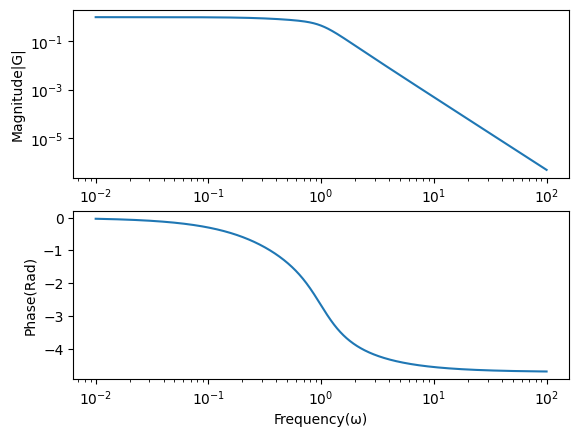

In [38]:
bode(G1*G2)

# Nyquist real imaginary

In [39]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')

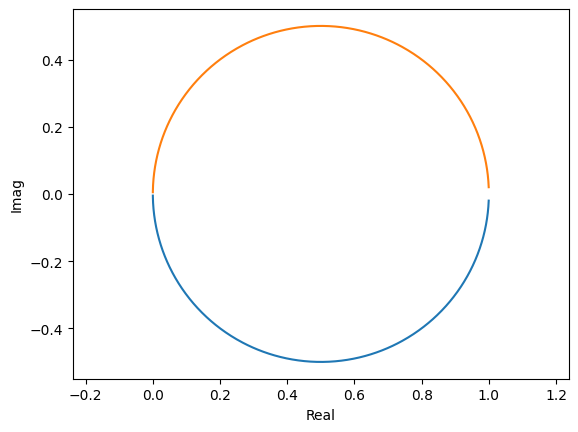

In [40]:
nyquist(G1)

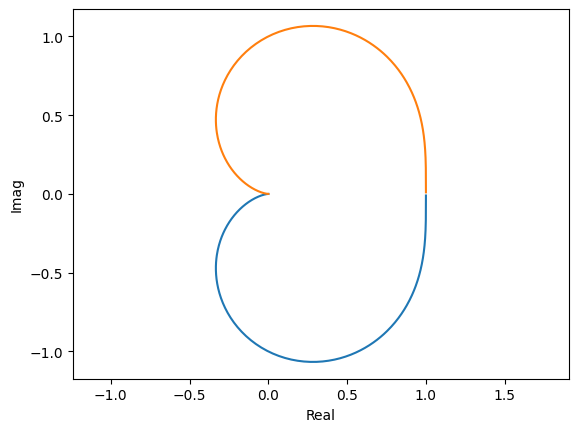

In [41]:
nyquist(G2)

# Library [control](https://python-control.readthedocs.io/en/0.9.4/index.html) を使う
pip install control

In [43]:
import control

In [44]:
G = control.tf(1, [tau**2, 2*tau*zeta, 1])

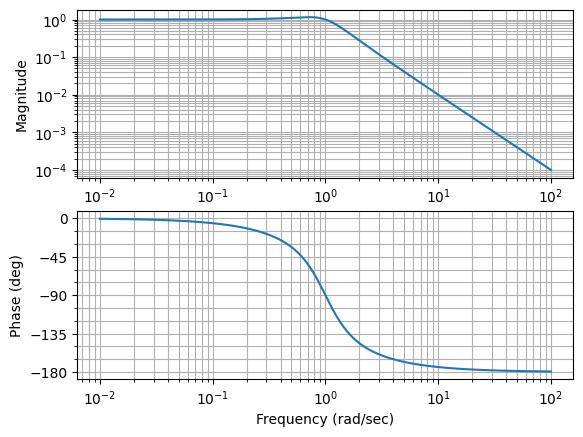

In [45]:
control.bode(G, omega);

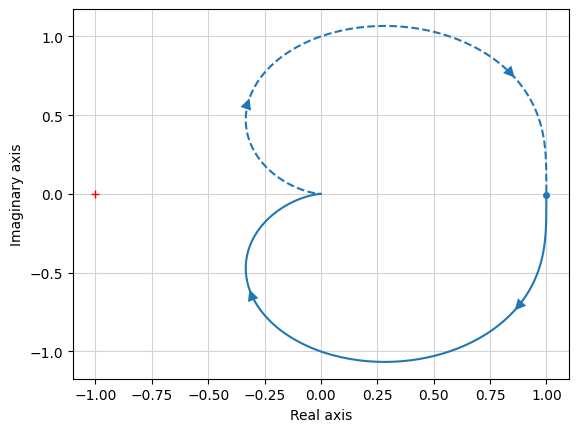

In [46]:
control.nyquist_plot(G, omega);